In [18]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import joblib


In [8]:
#Load the dataset
df = pd.read_csv("flow_congestions_data.csv")

# Display basic info
print("Shape:", df.shape)
df.head()

Shape: (205167, 84)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [15]:
#Select relevant features
selected_features = [
    'Flow Duration',
    'Tot Fwd Pkts', 'Tot Bwd Pkts',
    'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
    'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean',
    'Flow Byts/s', 'Flow Pkts/s',
    'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std'
]

df = df[selected_features].dropna()




In [16]:
#normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [17]:
# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
predictions = iso_forest.fit_predict(scaled_data)

# Add predictions to the DataFrame
df['anomaly'] = predictions
df['anomaly'] = df['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Count results
df['anomaly'].value_counts()


anomaly
normal     194910
anomaly     10257
Name: count, dtype: int64

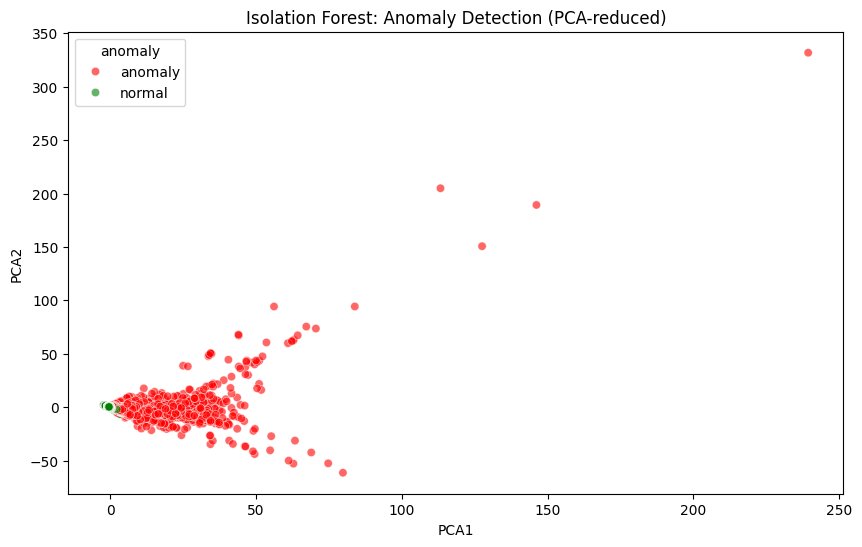

In [12]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for plotting
df_plot = pd.DataFrame()
df_plot['PCA1'] = pca_result[:, 0]
df_plot['PCA2'] = pca_result[:, 1]
df_plot['anomaly'] = df['anomaly']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='anomaly', palette={'normal': 'green', 'anomaly': 'red'}, alpha=0.6)
plt.title('Isolation Forest: Anomaly Detection (PCA-reduced)')
plt.show()


In [19]:
# Save the trained Isolation Forest model
joblib.dump(iso_forest, 'isolation_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']